"""

Description to accompany the movement data analysis in `scripts/movement.py`. 

Written by Ed Oughton.

March 2020. 

"""
Which geographic areas should I target for 'WarDriving'?

We specifically want to have an understanding of busy areas across both daytime and nighttime periods. Without moving to full dynamic transport modeling, we can derive insight by estimating:

- The residential population - so where people generally live and usually spend evenings and weekends.
- The local labour workforce - so where people are employed and generally spend the working day. 

Using these metrics, we can then estimate various indicators which provide insight into human movement, and how this may affect both WiFi and cellular demand. These metrics include:

- Population 
    The resident (nighttime) population in a local area. 
- Population density (persons per km^2)
    The density of the resident (nighttime) population in a local area. 
- Area (km^2)
    The surface area of a local area. 
- Employment density (employment per km^2)
    The density of the local (daytime) labour market in a local area. 
- Daytime percentage change (%)
    The difference between the daytime and nightime population. A negative value means people leave the area in the daytime to work in 
    other locations, whereas a positive number means people move into the local area for employment during the day. 
- Maximum people
    The summation of both daytime and nighttime population. This should be treated as an upper bound of the potential users in an 
    area. 
- Maximum people density (people per km^2)
    The maximum density of people based on the summation of both daytime and nighttime population. This should be treated as an upper 
    bound of the potential user density in an area.
- Maximum increase (%)
    The maximum change between the nighttime population and the summation of the daytime and nighttime population. 

I will now step through the results generated in this analysis. 

In [13]:
import pandas as pd
import os

#let's first import the movement data generated by scripts/movement.py
data = pd.read_csv(os.path.join('..', 'results', 'pcd_sector_movement.csv'))

data.head()

,year,lad,id,population,StrSect,employment,area_km2,pop_density_km2,emp_density_km2,daytime_change_perc,max_persons,max_persons_density,max_increase_perc,geotype
0,2020,E06000001,TS233,11481,TS233,2975,7.786260,1474.520425,382.083291,-74.087623,14456,1856.603717,25.912377,Suburban
1,2020,E06000001,TS240,6246,TS240,5950,3.515636,1776.634192,1692.438911,-4.739033,12196,3469.073103,95.260967,Suburban
2,2020,E06000001,TS247,1988,TS247,5500,0.807021,2463.380622,6815.187837,176.659960,7488,9278.568459,276.659960,Suburban
3,2020,E06000001,TS248,5865,TS248,875,1.304617,4495.570792,670.694705,-85.080989,6740,5166.265497,14.919011,Suburban
4,2020,E06000001,TS249,6894,TS249,2750,3.182385,2166.299965,864.131840,-60.110241,9644,3030.431805,39.889759,Suburban


Firstly, we want to understand the distribution of the population across postcode sectors and local authorities

In [14]:
print('')
print('We have {} postcode sectors within a total of {} Local Authority Districts.'.format(len(data.id.unique()), len(data.lad.unique())))
print('')
print('The population totals {} million and the geographic area is {} km^2.'.format(round(data.population.sum()/1e6), int(round(data.area_km2.sum()))))
print('')
print('This data covers England, Scotland and Wales, but excludes Northern Ireland.')


We have 9212 postcode sectors within a total of 378 Local Authority Districts.

The population totals 65.0 million and the geographic area is 225972 km^2.

This data covers England, Scotland and Wales, but excludes Northern Ireland.


(0, 38901.45)

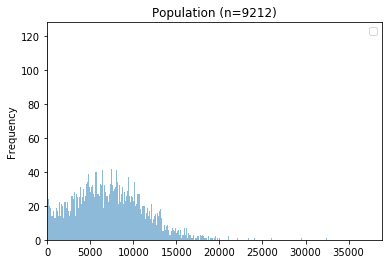

In [15]:
import matplotlib.pyplot as plt
plt.figure()
data['population'].plot.hist(alpha=0.5, bins=1000)
n = len(data)
plt.title('Population (n={})'.format(n))
plt.legend('')
plt.xlim(0)
#most postcode sectors have an average population of ~7.5k. 
#few postcode sectors have a population over 15k.

(0, 44668.87364325279)

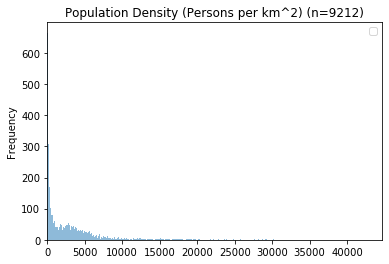

In [4]:
plt.figure()
data['pop_density_km2'].plot.hist(alpha=0.5, bins=1000)
n = len(data)
plt.title('Population Density (Persons per km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)
#most postcode sectors have a pop density below 5k persons per square kilometer.
#some have very high pop density, going all the way up to 40k per km^2. Often these are outliers or statistical artifacts. 
#for example, large towerblocks often get their own postcode which can lead to very high density.  

(0, 313.0877576724364)

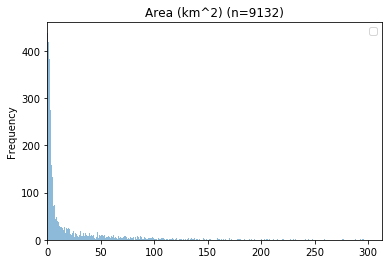

In [5]:
plt.figure()
subset = data.loc[data['area_km2'] <= 300]
n = len(subset)
subset['area_km2'].plot.hist(alpha=0.5, bins=1000)
plt.title('Area (km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)
#many postcodes have a very small area <10km^2. Only a few go above 50km^2, with Inverness (Soctland) producing many 
#in the upper end of the distribution.  

(0, 5240.546680437644)

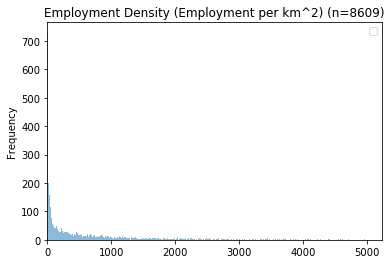

In [6]:
plt.figure()
subset = data.loc[data['emp_density_km2'] <= 5000]
subset['emp_density_km2'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Employment Density (Employment per km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)

(-100, 100)

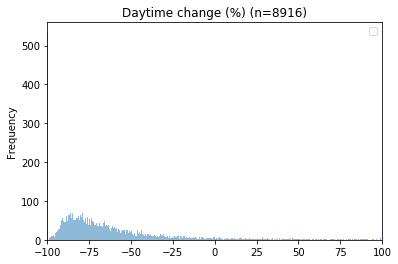

In [7]:
plt.figure()
subset = data.loc[data['daytime_change_perc'] <= 200]
subset['daytime_change_perc'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Daytime change (%) (n={})'.format(n))
plt.legend('')
plt.xlim(-100, 100)

(0, 352805.25)

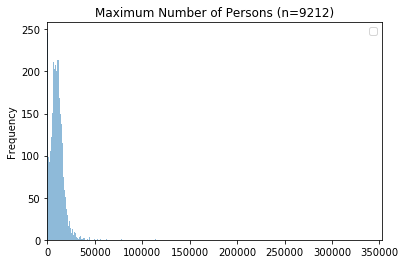

In [8]:
plt.figure()
data['max_persons'].plot.hist(alpha=0.5, bins=1000)
n = len(data)
plt.title('Maximum Number of Persons (n={})'.format(n))
plt.legend('')
plt.xlim(0)

(0, 20982.70576034405)

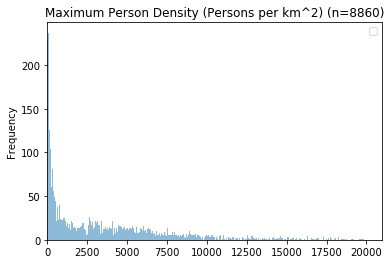

In [9]:
plt.figure()
subset = data.loc[data['max_persons_density'] <= 20000]
subset['max_persons_density'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Maximum Person Density (Persons per km^2) (n={})'.format(n))
plt.legend('')
plt.xlim(0)

(0, 1046.195652173913)

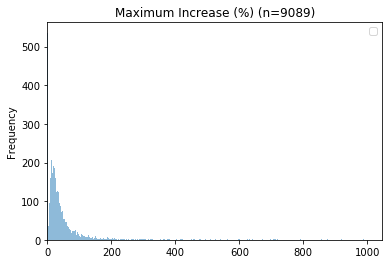

In [10]:
plt.figure()
subset = data.loc[data['max_increase_perc'] <= 1000]
subset['max_increase_perc'].plot.hist(alpha=0.5, bins=1000)
n = len(subset)
plt.title('Maximum Increase (%) (n={})'.format(n))
plt.legend('')
plt.xlim(0)

C:\Users\edwar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\edwar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

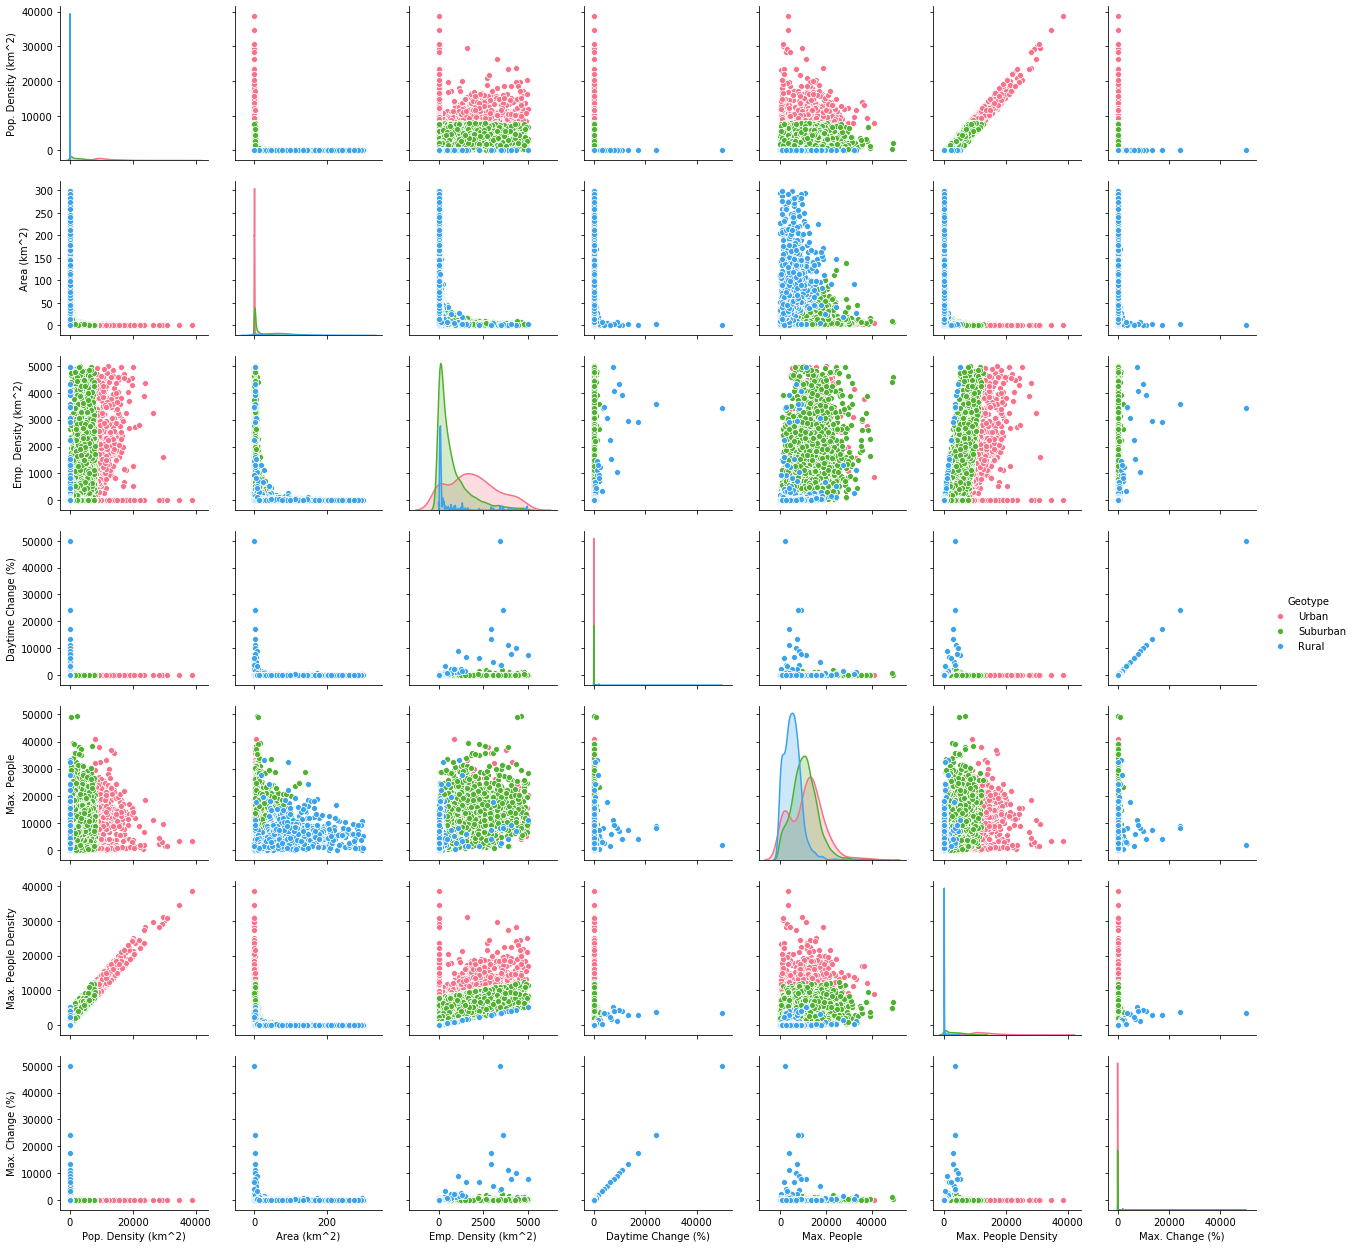

In [11]:
import seaborn as sns

data = data.loc[data['area_km2'] < 300]
data = data.loc[data['emp_density_km2'] < 5000]

data = data[[
    'pop_density_km2', 'area_km2',
    'emp_density_km2', 'daytime_change_perc',
    'max_persons', 'max_persons_density', 'max_increase_perc',
    'geotype'
]]

data.columns = [
    'Pop. Density (km^2)', 'Area (km^2)',
    'Emp. Density (km^2)', 'Daytime Change (%)',
    'Max. People', 'Max. People Density', 'Max. Change (%)',
    'Geotype'
]

plt.figure()
sns.pairplot(data, hue = 'Geotype', hue_order = ['Urban', 'Suburban', 'Rural'], diag_kind = "kde", kind = "scatter", palette = 'husl')
